# Perceptron

The perceptron is a basic linear classifier for binary classification. It combines input features with weights and a bias, applies an activation function, and adjusts its parameters to learn how to separate different classes based on its training data.

Example: **AND Function** | https://ricardomatsumura.medium.com/perceptrons-f18935009a61

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([0.5, 0.5])
b = -0.5

X = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

for a in X:
    s = w @ a.T + b
    yi = 1 if s >= 0 else -1
    print(a[0], a[1], s, yi, sep='\t')

-1	-1	-1.5	-1
-1	1	-0.5	-1
1	-1	-0.5	-1
1	1	0.5	1


**Decision boundary equation**: Solve the Perceptron function for y

In [ ]:
from sympy import symbols, Eq, solve, expand, Symbol

def get_decision_boundary():
    w1, w2 = symbols('w1 w2')
    x, y, b = symbols('x y b')

    eq = Eq(w1 * x + w2 * y + b, 0)
    decision_boundary = solve(eq, y, simplify=False)[0]

    return Eq(y, decision_boundary)

decision_boundary_eq = get_decision_boundary()
decision_boundary_eq

Eq(y, -b/w2 - w1*x/w2)

**Plot decision boundary**

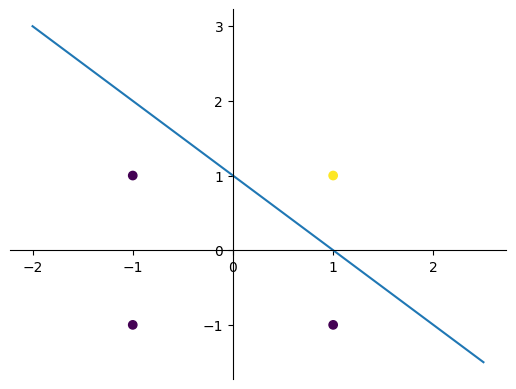

In [ ]:
# Set cartesian plane
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

plt.scatter(X[:, 0], X[:, 1], c=y)

intercept = -(b / w[1])
slope = -(w[0] / w[1])

f = np.vectorize(
    lambda x: (slope * x) + intercept
)

fx = np.arange(-2, 3, 0.5)
fy = f(fx)

plt.plot(fx, fy)

## `dogs_cats.csv` Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("dogs_cats.csv", index_col=0)

print(df.shape)

df.sample(3)

(2000, 3)


,comprimento,peso,classe
64,54.533083,414.710697,cachorro
114,49.431077,479.487190,cachorro
1641,39.758895,504.406642,gato


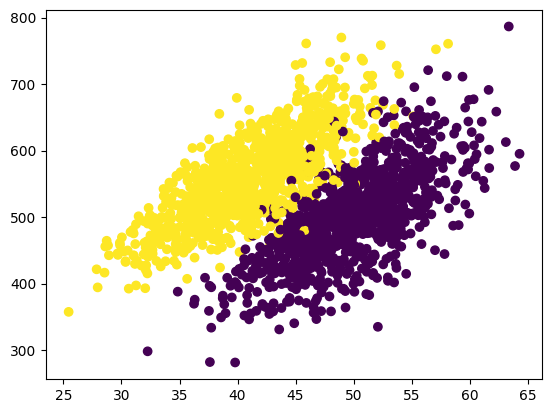

In [ ]:
df["classe"] = df["classe"].replace({
    "gato": 1,
    "cachorro": 0
})

plt.scatter(df["comprimento"],
            df["peso"],
            c=df["classe"])

[-1.56227369 -0.55524764] 1.8906686632422465
[-4879.47437559   410.26199547] 59.690668663242825


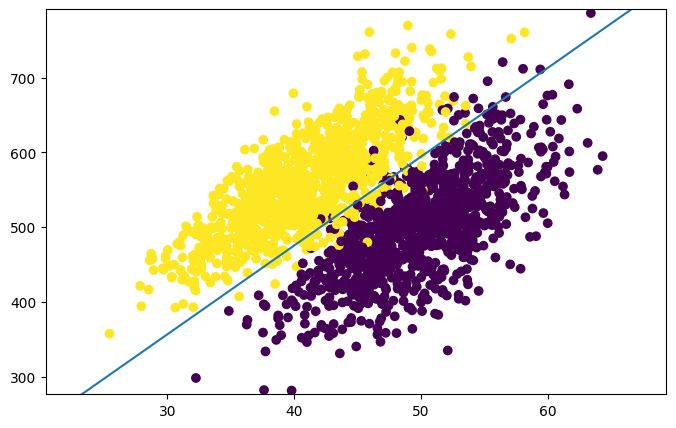

In [ ]:
class Perceptron:
    def __init__(self, dims=2, epochs=100, lr=0.1):
        self.weights = np.random.randn(dims)
        self.bias = np.random.randn()

        # Hyperparameters
        self.epochs = epochs
        self.lr = lr

    def predict(self, x):
        s = self.weights @ x + self.bias
        # Activation function
        y = 1 if s >= 0 else 0

        return y

    def fit(self, X, y):
        for i in range(self.epochs):
            for x, y_true in zip(X, y):
                y_pred = self.predict(x)

                error = self.lr * (y_true - y_pred)

                self.bias += error
                self.weights += error * x

        return self

    def plot(self, X, y):
        if self.weights.shape[0] != 2:
            return None

        figure = plt.figure(figsize=(8, 5))
        plt.scatter(X[:, 0], X[:, 1], c=y)

        # Plot perceptron line
        intercept = -(self.bias / self.weights[1])
        slope = -(self.weights[0] / self.weights[1])

        f = np.vectorize(
            lambda x: (slope * x) + intercept
        )

        fx = np.linspace(0, 1e+5, 2)
        fy = f(fx)

        plt.plot(fx, fy)
        plt.xlim([min(X[:, 0]) - 5, max(X[:, 0]) + 5])
        plt.ylim([min(X[:, 1]) - 5, max(X[:, 1]) + 5])


X = df[["comprimento", "peso"]].values
y = df["classe"].values

perceptron = Perceptron(epochs=100, lr=0.1)
print(perceptron.weights, perceptron.bias)
perceptron.fit(X, y)
print(perceptron.weights, perceptron.bias)
perceptron.plot(X, y)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = np.array([perceptron.predict(x) for x in X])
accuracy = accuracy_score(y, y_pred)

accuracy

0.962

**Properly evaluating the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y)

perceptron = Perceptron(epochs=100, lr=0.1).fit(X_train, y_train)

y_pred = np.array([perceptron.predict(x) for x in X_test])

report = classification_report(y_test, y_pred, target_names=["gato", "cachorro"])
print(report)

              precision    recall  f1-score   support

        gato       0.99      0.87      0.92       246
    cachorro       0.89      0.99      0.93       254

    accuracy                           0.93       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.93      0.93       500



**Get accuracy from cross validation**

In [ ]:
from sklearn.model_selection import KFold

def cross_validate(X, y, classifier_class, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    accuracy_scores = list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier = classifier_class()

        classifier.fit(X_train, y_train)
        y_pred = np.array([classifier.predict(x) for x in X_test])

        accuracy = np.mean(y_pred == y_test)
        accuracy_scores.append(accuracy)

    return accuracy_scores

scores = cross_validate(X, y, Perceptron)

print("Accuracy scores for each fold:", scores)
print(f"Mean accuracy: {np.mean(scores):.4}")


Accuracy scores for each fold: [0.9525, 0.945, 0.97, 0.9625, 0.78]
Mean accuracy: 0.922


**Comparing with Scikit-learn model**

In [ ]:
from sklearn.linear_model import Perceptron as PerceptronSKL

perceptron_skl = PerceptronSKL(max_iter=100, eta0=0.1).fit(X_train, y_train)

y_pred_sk = perceptron_skl.predict(X_test)

report = classification_report(y_test, y_pred_sk, target_names=["gato", "cachorro"])
print(report)

              precision    recall  f1-score   support

        gato       0.98      0.90      0.94       246
    cachorro       0.91      0.98      0.95       254

    accuracy                           0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

correct_y = np.array(y_pred == y_test).astype(int)
correct_y_sk = np.array(y_pred_sk == y_test).astype(int)

df = pd.DataFrame(data=np.stack(
    (correct_y, correct_y_sk), axis=1
), columns=["Implementation", "Sklearn"])

contingency_table = pd.crosstab(
    df["Implementation"], df["Sklearn"]
)

contingency_table

Sklearn,0,1
Implementation,,
0,28,7
1,1,464


In [ ]:
result = mcnemar(contingency_table, exact=True)

print(f'statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}')

alpha = 0.05

if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

statistic=1.000, p-value=0.070
Same proportions of errors (fail to reject H0)
